# Олон дараалал дээрх зэрэгцүүлэлт (Multiple Sequence Alignment)  

**Multiple Sequence Alignment (MSA)** асуудал нь Хоёр дараалал дээрх зэрэгцүүлэлтийг **𝑁(𝑁 > 2)** дараалал дээр буюу ерөнхий тохиолдолд нь авч үздэг.

**Тооцооллын хүндрэл**
MSA асуудал нь тооцооллын хүндрэлийн хувьд NP-hard ангид хамаардаг.

## 1. Олон дараалал зэрэгцүүлэлт ба DP

**Хос дараалал зэрэгцүүлэлт нь 2D матрицууд (оноо болон trace-back)-ыг байгуулдаг бол MSA-ын оновчтой шийдэд 𝑁 хэмжээст бүтцүүд (hypercubes) шаардлагатай.**

- 𝑁 = 3 байхад DP алгоритмын 𝑆 ба 𝑇 матрицууд нь 3 хэмжээстэй байна.

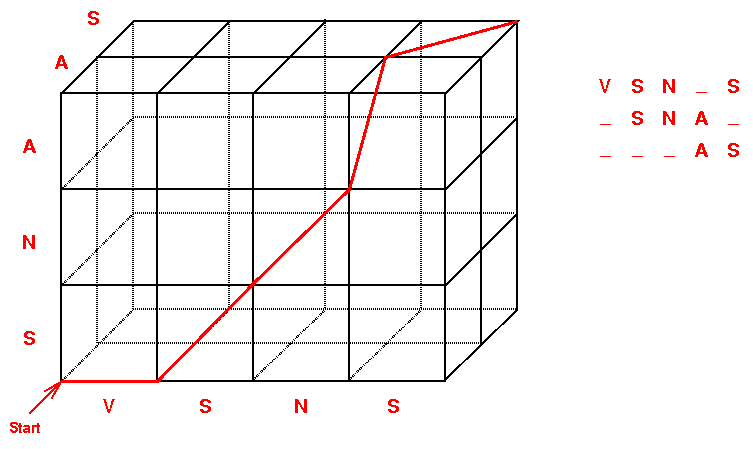

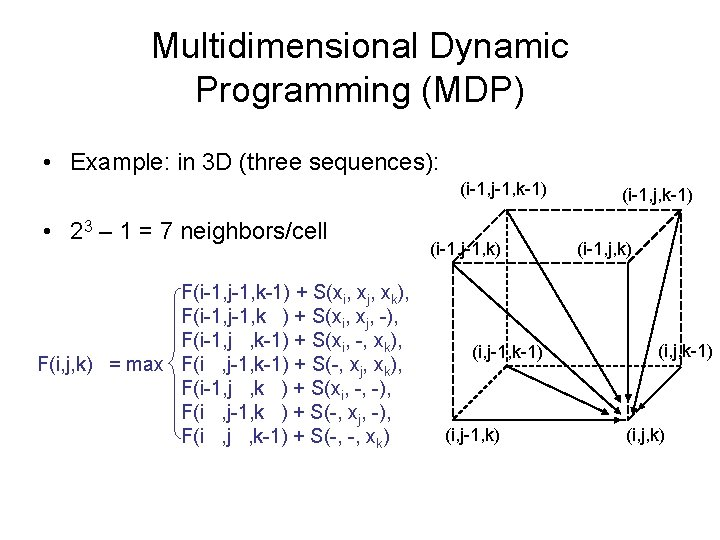

## 2. Хьюристик алгоритмууд

**MSA-д зориулсан хьюристик алгоритмуудыг ерөнхийд нь дараах байдлаар ангилж болно.**
   - **Прогрессив (Progressive)** – эхлээд хоёр дарааллыг харьцуулж, дараа нь үлдсэн дарааллуудыг давтан нэмж харьцуулна.
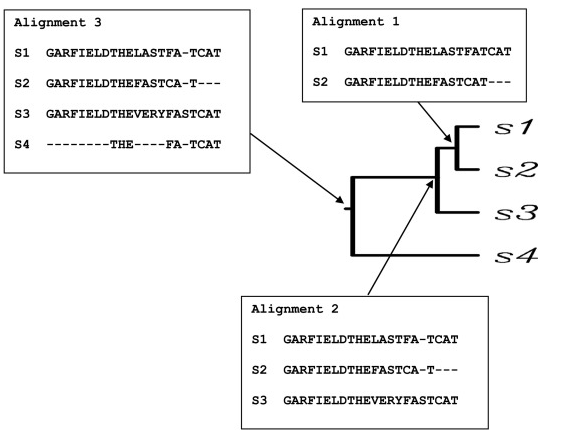
   
   - **Давталттай (Iterative)** – зайг зөөх, нэмэх, устгах байдлаар эхний зэрэгцүүлэлтийг сайжруулахыг оролдоно.
   - **Гибрид (Hybrid)** – стратегиудыг хослуулах, гүйцээлт (complementary) мэдээлэл (уургийн бүтцийн мэдээлэл, жишиг локал зэрэгцүүлэлтийн сан г.м) хэрэглэх боломжтой.

## 3. Прогессив зэрэгцүүлэлтийг Python-аар хэрэгжүүлэх нь. 

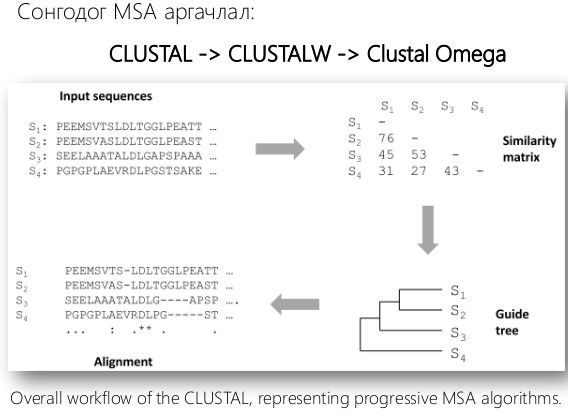

# MyAlign-Зэрэгцүүлэлтийн илэрхийлэх

In [1]:
# al_type - төрөл (ДНХ, РНХ, уураг)
# listseqs - дарааллын жагсаалт
# string, зайг "-"

class MyAlign:

    # init obj
    def __init__(self, lseqs, al_type = "protein"):
        self.listseqs = lseqs
        self.al_type = al_type
    
    # seq 1 iin urt
    # ooroor helbel number of columns
    def __len__(self): 
        return len(self.listseqs[0])
    
    # 
    def __getitem__(self, n):
        if type(n) is tuple and len(n) == 2: 
            i, j = n
            return self.listseqs[i][j]
        elif type(n) is int: return self.listseqs[n]
        return None
    
    # listiig haritsuulj harah
    def __str__(self):
        res = ""
        for seq in self.listseqs:
            res += "\n" + seq 
        return res
    
    # listiin urtiig 
    # matrix = 2
    def num_seqs(self):
        return len(self.listseqs)
   
    # indice = 2
    # ATGA-A
    # AA-AT-
    # return [G, -]
    def column (self, indice):
        res = []
        for k in range(len(self.listseqs)):
            res.append(self.listseqs[k][indice])
        return res
    
    # Бас нэг чухал метод бол Зэрэгцүүлэлтийн тогтворжон хэлбэрийг үүсгэх тооцоолол
    # Тогтворжсон хэлбэрийг зэрэгцүүлэлтийн багана бүрийн хувьд зайг тооцоогүй хамгийн өндөр
    # давтамжтай тэмдэгтүүдийн дараалалаар илэрхийлнэ.
    # Энэ метод нь dictionary ашиглан багана бүрийн тэмдэгтүүдийн давтамжийг тоолж, хамгийн олныг сонгоно
    # ATGA-A
    # AA-AT-
    # ATGATA <--return
    def consensus (self):
        cons = ""
        for i in range(len(self)):
            cont = {}
            for k in range(len(self.listseqs)):
                c = self.listseqs[k][i]
                if c in cont:
                    cont[c] = cont[c] + 1
                else: 
                    cont[c] = 1
            maximum = 0
            cmax = None
            for ke in cont.keys():
                if ke != "-" and cont[ke] > maximum: 
                    maximum = cont[ke]
                    cmax = ke
            cons = cons + cmax
        return cons
    
    def exercise4(self):
        res = []
        for c in range(len(self)):
            col = self.column(c)
            num = 0
            for aa in col: 
                if aa == "R" or aa== "H" or aa == "K": 
                    num += 1
            if num >= len(col)/2: 
                res.append(c)
        return res

alig = MyAlign(["ATGA-A","AA-AT-"],"dna")
print("columnii urt: ", alig.__len__());
#print(alig)
#print(len(alig))
#print(alig.column(2))
#print(alig[1,1])
#print(alig[0])
#print("str: ",alig.__str__())
print(alig.consensus())

columnii urt:  6
ATGATA


# SubstMatrix - Орлуулах матриц

In [2]:
# Dictionary бүтцэд суурилан дүрсэлсэн орлуулах матрицыг ашиглана.
# цагаан толгойг хадгалдаг аттрибут
# хос тэмдэгтүүдийн оноотой dictionary
class SubstMatrix:

    def __init__(self):
        self.alphabet = ""
        self.sm = {}
        
    def __getitem__(self, ij):
        i, j = ij
        return self.score_pair(i, j)
    
    # orluulah matrix aa ashiglana 
    # score pair onoog ni gargah
    def score_pair(self, c1, c2):
        if c1 not in self.alphabet or c2 not in self.alphabet:
            return None
        return self.sm[c1+c2]
    
    # files - aas orluulah matrix oruulah
    def read_submat_file(self, filename, sep):
        f = open(filename, "r")
        line = f.readline()
        tokens = line.split(sep)
        ns = len(tokens)
        self.alphabet = ""
        for i in range(0, ns): 
            self.alphabet += tokens[i][0]
        for i in range(0,ns):
            line = f.readline();
            tokens = line.split(sep);
            for j in range(0, len(tokens)):
                k = self.alphabet[i]+self.alphabet[j]
                self.sm[k] = int(tokens[j])
        f.close()
        return None
    
    # orluulah matrix vvsgeh
    def create_submat(self, match, mismatch, alphabet):
        self.alphabet = alphabet
        for c1 in alphabet:
            for c2 in alphabet:
                if (c1 == c2):
                    self.sm[c1+c2] = match
                else:
                    self.sm[c1+c2] = mismatch
        return None

def test1():
    sm = SubstMatrix()
    sm.read_submat_file("files/blosum62.mat", "\t")
    print(sm.alphabet)
    print(sm.score_pair("G", "M"))
    print(sm.score_pair("W", "W"))
    print(sm.score_pair("A", "S"))
    print(sm.score_pair("X", "X"))
    print(sm["G","K"])
    print(sm["T","T"])

def test2():
    sm = SubstMatrix()
    sm.create_submat(3, -1, "ACGU")
    print(sm.alphabet)
    print(sm.score_pair("A", "A"))
    print(sm.score_pair("A", "U"))
    print(sm.score_pair("T", "T"))
    print(sm["G","G"])

test1()
print()
test2()

ARNDCQEGHILKMFPSTWYV
-3
11
1
None
-2
5

ACGU
3
-1
None
3


# My seq

In [3]:
def translate_codon (cod):
    """Translates a codon into an aminoacid using an internal dictionary with the standard genetic code."""
    tc = {"GCT":"A", "GCC":"A", "GCA":"A", "GCG":"A", 
      "TGT":"C", "TGC":"C",
      "GAT":"D", "GAC":"D",
      "GAA":"E", "GAG":"E",
      "TTT":"F", "TTC":"F",
      "GGT":"G", "GGC":"G", "GGA":"G", "GGG":"G",
      "CAT":"H", "CAC":"H",
      "ATA":"I", "ATT":"I", "ATC":"I",
      "AAA":"K", "AAG":"K",
      "TTA":"L", "TTG":"L", "CTT":"L", "CTC":"L", "CTA":"L", "CTG":"L",
      "ATG":"M", "AAT":"N", "AAC":"N",
      "CCT":"P", "CCC":"P", "CCA":"P", "CCG":"P",
      "CAA":"Q", "CAG":"Q",
      "CGT":"R", "CGC":"R", "CGA":"R", "CGG":"R", "AGA":"R", "AGG":"R",
      "TCT":"S", "TCC":"S", "TCA":"S", "TCG":"S", "AGT":"S", "AGC":"S",
      "ACT":"T", "ACC":"T", "ACA":"T", "ACG":"T",
      "GTT":"V", "GTC":"V", "GTA":"V", "GTG":"V",
      "TGG":"W",
      "TAT":"Y", "TAC":"Y",
      "TAA":"_", "TAG":"_", "TGA":"_"}
    if cod in tc: return tc[cod]
    else: return None

class MySeq: 
    
    def __init__ (self, seq, seq_type = "DNA"): 
        self.seq = seq.upper()
        self.seq_type = seq_type

    def __len__(self):
        return len(self.seq)
    
    def __getitem__(self, n):
        return self.seq[n]
    
    # i - aas j-1 hvrtel tasalj awna
    def __getslice__(self, i, j):
        return self.seq[i:j]

    def __str__(self):
        return self.seq
        
    def get_seq_biotype (self):
        return self.seq_type
        
    def show_info_seq (self):
        print ("Sequence: " + self.seq + " biotype: " + self.seq_type)
        
    def alphabet (self):
        if (self.seq_type=="DNA"): return "ACGT"
        elif (self.seq_type=="RNA"): return "ACGU"
        elif (self.seq_type=="PROTEIN"): return "ACDEFGHIKLMNPQRSTVWY"
        else: return None
    
    def validate (self):
        alp = self.alphabet()
        res = True
        i = 0
        while i < len(self.seq) and res:
            if self.seq[i] not in alp: res = False
            else: i += 1
        return res 
    
    def transcription (self):
        if (self.seq_type == "DNA"):
            return MySeq(self.seq.replace("T","U"), "RNA")
        else:
            return None

    def reverse_comp (self):
        if (self.seq_type != "DNA"): return None
        comp = ""
        for c in self.seq:
            if (c == 'A'): comp = "T" + comp 
            elif (c == "T"): comp = "A" + comp 
            elif (c == "G"): comp = "C" + comp
            elif (c== "C"): comp = "G" + comp
        return MySeq(comp, "DNA")
        
    def translate (self, iniPos= 0):
        if (self.seq_type != "DNA"): return None
        seq_aa = ""
        for pos in range(iniPos,len(self.seq)-2,3):
            cod = self.seq[pos:pos+3]
            seq_aa += translate_codon(cod)
        return MySeq(seq_aa, "PROTEIN")

if __name__ == "__main__":   
    s1 = MySeq("ATGTGATAAGAATAGAATGCTGAATAAATAGAATGACAT")
    s2 = MySeq("MKVVLSVQERSVVSLL", "PROTEIN")
    print(s1.validate(), s2.validate())
    print(s1)
    s3 = s1.transcription()
    s3.show_info_seq()
    s4 = s1.reverse_comp().translate()
    s4.show_info_seq()
    print(s1.translate())

True True
ATGTGATAAGAATAGAATGCTGAATAAATAGAATGACAT
Sequence: AUGUGAUAAGAAUAGAAUGCUGAAUAAAUAGAAUGACAU biotype: RNA
Sequence: MSFYLFSILFLSH biotype: PROTEIN
M__E_NAE_IE_H


# PairwiseAlignment (Хос зэрэгцүүлэлт)

In [4]:
# орлуулах матриц ба зай-торгууль
# зэрэгцүүлэх дарааллууд,
# DP алгоритмын S ба T матрицууд.
class PairwiseAlignment:

    def __init__(self, sm, g):
        self.g = g
        self.sm = sm
        self.S = None
        self.T = None
        self.seq1 = None
        self.seq2 = None
        
    def score_pos (self, c1, c2):
        if c1 == "-" or c2=="-":
            return self.g
        else:
            return self.sm[c1,c2]
        
    def score_alin(self, alin):
        res = 0;
        for i in range(len(alin)):
            res += self.scorePos (alin[0][i], alin[1][i])
        return res
    
    # Global alignment
    def needleman_Wunsch (self, seq1, seq2):
        if (seq1.seq_type != seq2.seq_type): return None
        self.S = [[0]]
        self.T = [[0]]
        self.seq1 = seq1
        self.seq2 = seq2
        for j in range(1, len(seq2)+1):
            self.S[0].append(self.g * j)
            self.T[0].append(3)
        for i in range(1, len(seq1)+1):
            self.S.append([self.g * i])
            self.T.append([2])
        for i in range(0, len(seq1)):
            for j in range(len(seq2)):
                s1 = self.S[i][j] + self.score_pos (seq1[i], seq2[j])
                s2 = self.S[i][j+1] + self.g
                s3 = self.S[i+1][j] + self.g
                self.S[i+1].append(max(s1, s2, s3))
                self.T[i+1].append(max3t(s1, s2, s3))
        return self.S[len(seq1)][len(seq2)]
    
    def recover_align (self):
        res = ["", ""]
        i = len(self.seq1)
        j = len(self.seq2)
        while i>0 or j>0:
            if self.T[i][j]==1:
                res[0] = self.seq1[i-1] + res[0]
                res[1] = self.seq2[j-1] + res[1]
                i -= 1
                j -= 1
            elif self.T[i][j] == 3:
                res[0] = "-" + res[0]
                res[1] = self.seq2[j-1] + res[1] 
                j -= 1
            else:
                res[0] = self.seq1[i-1] + res[0]
                res[1] = "-" + res[1]
                i -= 1
        return MyAlign(res, self.seq1.seq_type)
     
    # local align ment 
    def smith_Waterman (self, seq1, seq2):
        if (seq1.seq_type != seq2.seq_type): return None
        self.S = [[0]]
        self.T = [[0]]
        self.seq1 = seq1
        self.seq2 = seq2
        maxscore = 0
        for j in range(1, len(seq2)+1):
            self.S[0].append(0)
            self.T[0].append(0)
        for i in range(1, len(seq1)+1):
            self.S.append([0])
            self.T.append([0])
        for i in range(0, len(seq1)):
            for j in range(len(seq2)):
                s1 = self.S[i][j] + self.score_pos(seq1[i], seq2[j]) 
                s2 = self.S[i][j+1] + self.g
                s3 = self.S[i+1][j] + self.g
                b = max(s1, s2, s3)
                if b <= 0:
                    self.S[i+1].append(0)
                    self.T[i+1].append(0)
                else:
                    self.S[i+1].append(b)
                    self.T[i+1].append(max3t(s1, s2, s3))
                    if b > maxscore: 
                        maxscore = b
        return maxscore

    def recover_align_local (self):
        res = ["", ""]
        maxscore = 0
        maxrow = 0
        maxcol = 0
        for i in range(1,len(self.S)):
            for j in range(1, len(self.S[i])):
                if self.S[i][j] > maxscore:
                    maxscore = self.S[i][j]
                    maxrow = i
                    maxcol = j
        i = maxrow
        j = maxcol
        while i>0 or j>0:
            if self.T[i][j]==1:
                res[0] = self.seq1[i-1] + res[0]
                res[1] = self.seq2[j-1] + res[1]
                i -= 1
                j -= 1
            elif self.T[i][j] == 3:
                res[0] = "-" + res[0];
                res[1] = self.seq2[j-1] + res[1]; 
                j -= 1
            elif self.T[i][j] == 2:
                res[0] = self.seq1[i-1] + res[0];
                res[1] = "-" + res[1]; 
                i -= 1
            else: break
        return MyAlign(res, self.seq1.seq_type)


def max3t (v1, v2, v3):
    if v1 > v2:
        if v1 > v3: return 1
        else: return 3
    else:
        if v2 > v3: return 2
        else: return 3

def printMat (mat):
    for i in range(0, len(mat)):
        print(mat[i])
        
def test():
    seq1 = MySeq("ATGATATGATGATT")
    seq2 = MySeq("GATGAATAGATGTGT")
    sm = SubstMatrix()
    
    #sm.create_submat(3, -1, "ACGT")
    sm.read_submat_file("files/blosum62.mat", "\t")
    
    alin = PairwiseAlignment(sm, -3)
    print("Score of optimal alignment: ", alin.smith_Waterman(seq1, seq2))
    printMat(alin.S)
    print(alin.recover_align_local())
    
    print('Score of optimal alignment:',alin.needleman_Wunsch(seq1,seq2))
    printMat(alin.S)
    print(alin.recover_align())

test()

Score of optimal alignment:  47
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 4, 1, 0, 4, 4, 1, 4, 1, 4, 1, 0, 0, 0, 0]
[0, 0, 1, 9, 6, 3, 4, 9, 6, 3, 1, 9, 6, 5, 2, 5]
[0, 6, 3, 6, 15, 12, 9, 6, 9, 12, 9, 6, 15, 12, 11, 8]
[0, 3, 10, 7, 12, 19, 16, 13, 10, 9, 16, 13, 12, 15, 12, 11]
[0, 0, 7, 15, 12, 16, 19, 21, 18, 15, 13, 21, 18, 17, 14, 17]
[0, 0, 4, 12, 15, 16, 20, 19, 25, 22, 19, 18, 21, 18, 17, 14]
[0, 0, 1, 9, 12, 15, 17, 25, 22, 23, 22, 24, 21, 26, 23, 22]
[0, 6, 3, 6, 15, 12, 15, 22, 25, 28, 25, 22, 30, 27, 32, 29]
[0, 3, 10, 7, 12, 19, 16, 19, 26, 25, 32, 29, 27, 30, 29, 32]
[0, 0, 7, 15, 12, 16, 19, 21, 23, 24, 29, 37, 34, 32, 29, 34]
[0, 6, 4, 12, 21, 18, 16, 18, 21, 29, 26, 34, 43, 40, 38, 35]
[0, 3, 10, 9, 18, 25, 22, 19, 22, 26, 33, 31, 40, 43, 40, 38]
[0, 0, 7, 15, 15, 22, 25, 27, 24, 23, 30, 38, 37, 45, 42, 45]
[0, 0, 4, 12, 13, 19, 22, 30, 27, 24, 27, 35, 36, 42, 43, 47]

ATGATAT-GATGAT-T
ATGA-ATAGATG-TGT
Score of optimal alignment: 44
[0, -3, -6, -9, -12, 

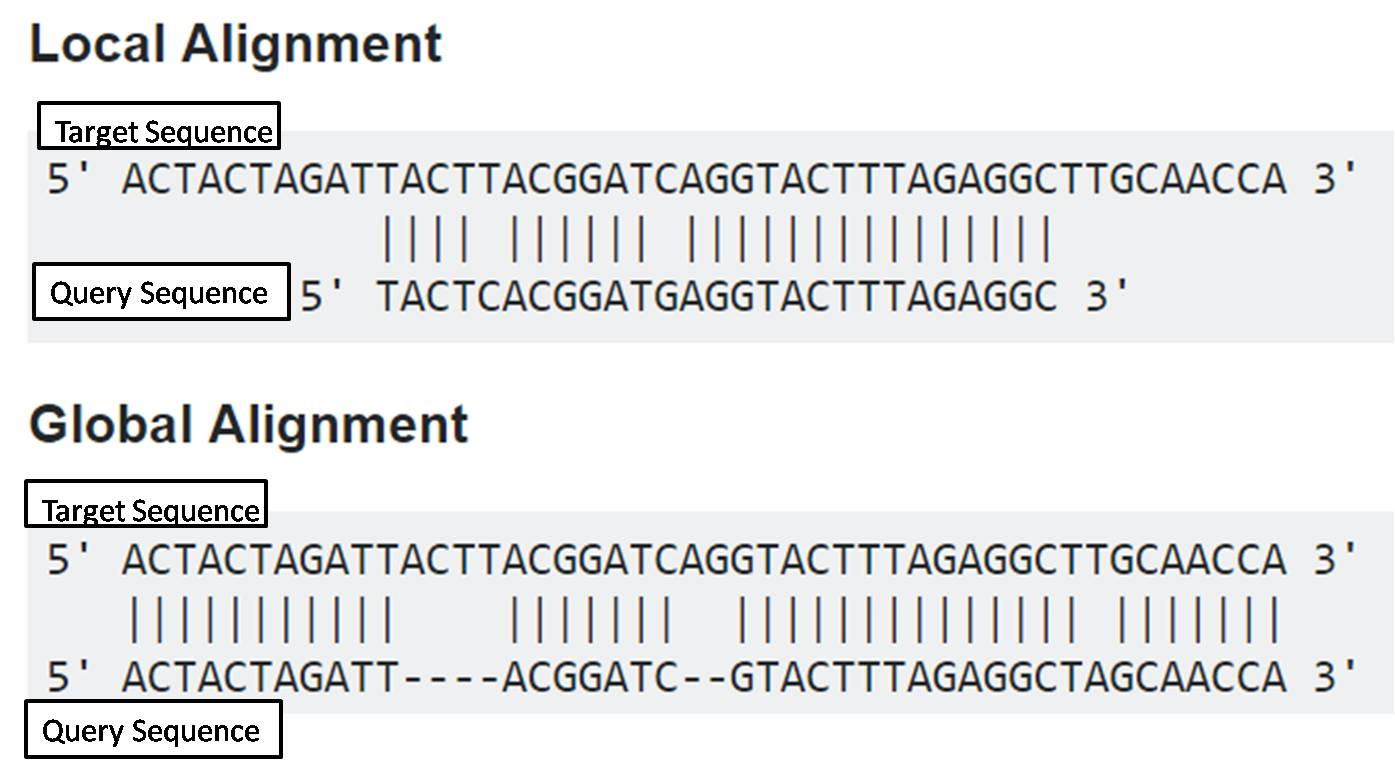

# MultipleAlignment()

In [5]:
# seqs – зэрэгцүүлсэн дарааллууд
# alignpars – Needleman-Wunsch алгоритмд хэрэглэгдэх зэрэгцүүлэлтийн параметерүүд

class MultipleAlignment():

    def __init__(self, seqs, alignseq):
        self.seqs = seqs
        self.alignpars = alignseq
    
    def num_seqs(self):
        return len(self.seqs)
    
    def add_seq_alignment (self, alignment, seq):
        res = []
        for i in range(len(alignment.listseqs)+1):
            res.append("")
        cons = MySeq(alignment.consensus(),alignment.al_type)
        self.alignpars.needleman_Wunsch(cons, seq)
        align2 = self.alignpars.recover_align()
        orig = 0
        for i in range(len(align2)):
            if align2[0,i]== '-':
                for k in range(len(alignment.listseqs)):
                    res[k] += "-"
            else:
                for k in range(len(alignment.listseqs)):
                    res[k] += alignment[k,orig]
                orig+=1
        res[len(alignment.listseqs)] = align2.listseqs[1]
        return MyAlign(res, alignment.al_type)
    
    def align_consensus(self):
        self.alignpars.needleman_Wunsch(self.seqs[0], self.seqs[1])
        res = self.alignpars.recover_align()

        for i in range(2, len(self.seqs)):
            res = self.add_seq_alignment(res, self.seqs[i])
        return res

def printMat (mat):
    for i in range(0, len(mat)):
        print(mat[i])
        
# Оролт: Өгөгдсөн дараалал, Өгөгдсөн дарааллын багц, Зэрэгцүүлэлтийн зорилгын функцийн параметрүүд
# (орлуулах матриц ба зай-торгууль)
# Гаралт: Дарааллын хамгийн боломжит зэрэгцүүлэлт.

# • Эхлээд эхний хоёр дараалал дээр Needleman-Wunsch алгоритмыг ашиглан зэрэгцүүлэлт байгуулна.
# • Дараа нь давталт бүрт дараагийн дарааллыг зэрэгцүүлэлтрүү нэмнэ. Энд тухайн зохицуулалтыг авч,
#   тогтворжсон хэлбэрийг тооцдог.
# • Улмаар уг тогворжсон хэлбэр руу Needleman-Wunsch алгоритмыг ашиглан шинэ дараалал зэрэгцүүлнэ.
# • Үүссэн зэрэгцүүлэлтийг тогтвожсон хэлбэрийн баганууд дээр үндэслэн дахин байгуулна. Ингэхдээ хэрэв
#   зэрэгцүүлэлт нь тухайн байрлалд зай байвал уг багананд зай авна.
        
def test_prot():  
    s1 = MySeq("PHWAS","protein")
    s2 = MySeq("HWASW","protein")
    s3 = MySeq("HPHWA","protein")
    sm = SubstMatrix()
    sm.read_submat_file("files/blosum62.mat", "\t")
    aseq = PairwiseAlignment(sm, -8)
    ma = MultipleAlignment([s1,s2,s3], aseq)
    alinm = ma.align_consensus()
    print(alinm)
    
def test():
    s1 = MySeq("ATAGC")
    s2 = MySeq("AACC")
    s3 = MySeq("ATGAC")
    
    sm = SubstMatrix()
    sm.create_submat(1,-1,"ACGT")
    aseq = PairwiseAlignment(sm,-1)
    ma = MultipleAlignment([s1,s2,s3], aseq)
    al = ma.align_consensus()
    print(al)

if __name__ == "__main__": 
    test_prot()
    print()
    test()
    print()
    


-PHWAS-
--HWASW
HPHWA--


ATAG-C
A-AC-C
AT-GAC



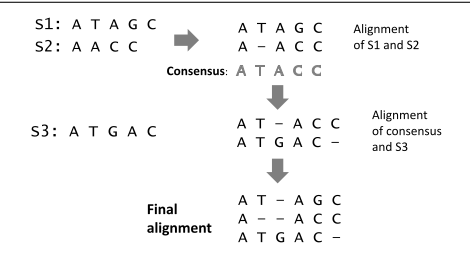

## 4. Exercises.

### Exercises1 
1. Consider the following four sequences of DNA:

S1: ACATATCAT

S2: AACAGATCT

S3: AGATATTAG

S4: GCATCGATT

Write a Python script, using the code developed in this chapter, to generate a multiple
alignment of these sequences using the progressive algorithm implemented in class Mul-tipleAlignment. Consider the parameters to be: match score = 1, mismatch = −1, gap
penalty g = −1.


In [6]:
def exercise1():    
    s1 = MySeq("ACATATCAT")
    s2 = MySeq("AACAGATCT")
    s3 = MySeq("AGATATTAG")
    s4 = MySeq("GCATCGATT")

    sm = SubstMatrix()
    sm.create_submat(1,-1,"ACGT") # match, mismatch, aplhabet
    aseq = PairwiseAlignment(sm,-1)# gap
    ma = MultipleAlignment([s1,s2,s3,s4], aseq)
    print(ma.align_consensus())
    # Гаралт: Дарааллын хамгийн боломжит зэрэгцүүлэлт.

exercise1()


A-CATATC-AT-
AACAGATC--T-
AG-ATATT-AG-
G-CAT--CGATT


### Exercise 2
2. Implement a method calculating the score sum of pairs (SP) of a given alignment. The method should be included in the MultipleAlignment class, taking as input an alignment (object of class MyAlign). Notice that the parameters for the score are given in an inter-nal variable of the class (alignpars).

In [7]:
def exercise2(lseqs, gap = -8):
    
    sm = SubstMatrix()
    sm.read_submat_file("files/blosum62.mat", "\t")
    
    scores = []
    for i in range(len(lseqs)-1):
        for j in range(len(lseqs[i])):
            s = 0
            su = []
            if(lseqs[i][j] == '-'):
                s = -8
                scores.append(-8)
            else: scores.append(sm.score_pair(lseqs[i][j], lseqs[i+1][j]))
    
    
    return scores#.replace('None', -8)

            
    
s1 = "-RADNS"
s2 = "ARCD-A"
s3 = "AR-D-A"
    
exercise2([s1,s2,s3])

# boloogvi

[-8, 5, 0, 6, None, 1, 4, 5, None, 6, -8, 4]

### Exercise 3

3. a. Consider the application of the Needleman-Wunsch algorithm to the protein se-quences: 
    S1: APSC; S2: TAPT, using the BLOSUM62 matrix and g = −4. Calculate the optimal alignment.
   
   b. Based on the result of the previous exercise, could the following alignment be pro-vided by the progressive algorithm implemented in this chapter?
   
        -AP-SC

        TAPT--

        TAT-S-

   c. Calculate the SP score of the previous alignment.
   
   d. Write a Python script, using the code developed in this chapter to confirm your re-sults.

In [8]:
def exercise3():
    s1 = MySeq('APSC',"PROTEIN")
    s2 = MySeq('TAPT', "PROTEIN")
    sm = SubstMatrix()
    sm.read_submat_file("files/blosum62.mat", "\t")

    aseq = PairwiseAlignment(sm,-4)# gap
    print('Score of optimal alignment:',aseq.needleman_Wunsch(s1,s2))
    printMat(aseq.S)
    print(aseq.recover_align())
    
    print()
    seq1= MySeq("-AP-SC","protein")
    seq2= MySeq("TAPT--","protein")
    seq3= MySeq("TAT-S-", "protein")
    ma = MultipleAlignment([seq1,seq2,seq3], aseq)
    #res = ma.align_consensus()
    
    
exercise3()
# SP score boloogvi

Score of optimal alignment: 4
[0, -4, -8, -12, -16]
[-4, 0, 0, -4, -8]
[-8, -4, -1, 7, 3]
[-12, -7, -3, 3, 8]
[-16, -11, -7, -1, 4]

-APSC
TAPT-



### Exercise 4

4. Write a method to add to the class **MyAlign** that, given an alignment (self ), returns the list of columns (indexes) in the alignment that are rich in polar basic aminoacids (R, H, or K). To be considered rich, the column needs to include at least half of the aminoacids in this group.

In [9]:
# MyAlign dahi code
def exercise4(self):
        res = []
        for c in range(len(self)):
            # c = 2
            # ATGA-A
            # AA-AT-
            # return [G, -]
            col = self.column(c)
            num = 0
            for aa in col: 
                if aa == "R" or aa== "H" or aa == "K": 
                    num += 1
            if num >= len(col)/2 :res.append(c)
        return res


alig = MyAlign(["VJKK","JRSK","VRSK"])# defualt bio type = protien
print(alig.exercise4())

[1, 3]


### Exercise 5

5. Write a method to add to the class **MyAlign** that, given an alignment (self ), returns a string with a symbol for each column of the alignment, following these rules: ‘*’, if the column is fully conserved (it has all symbols equal and no gaps); ‘:’, if the column has at least half of the symbols equal; ‘.’: if the column does not match any of the previous, but has no gaps; ‘ ’, in all other cases.

### Exercise 6

6. Write a method to add to the class **MultipleAlign** that, given an alignment (object of class **MyAlign**), identifies the columns where this alignment has high quality. In this case, a column is considered of high quality if the score of the alignment, calculated by the SP method is larger than 0. The method should return a list of indexes of the selected columns.

### Exercise 7

7. Consider the following sequence of aminoacids:

    MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTE
    DPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLG
    FLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQH
    MTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPE
    VGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGR
    DRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRE
    RFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD

    a. Through the NCBI site, use the BLASTP application to search for similar sequences
    (alternatively use BioPython interface for this purpose) – see Chapter 7 for details.

    b. From the result, select 10 to 12 matching sequences. Try to select different species
    and avoid sequences marked as “PREDICTED”. Save those into a file in the FASTA
    format. Keep as sequence identifiers (after the “>” in the first line) the species name,
    without spaces.
    
    c. In the EBI site, use the Clustal Omega application to get a multiple sequence align-
    ment using the previous set of sequences. Save the alignment (in the “clustal” for-
    mat) and the guide tree in two different files.
    
    d. Load the previous alignment using BioPython.
    
    e. Calculate the consensus of the alignment. Suggestion: check the class AlignInfo in
    the BioPython documentation or implement a function yourself
    
    f. Calculate a list of positions where the alignment is conserved (i.e. all sequences have the same aminoacid and there are no gaps). Calculate the percentage of these posi-tions in the whole alignment.
    
    g. From the previous information, get the region of the alignment more conserved, i.e.
    the longest sequence of consecutive conserved positions from the list above.



In [10]:
aaSeq= "MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTE DPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLG FLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQH MTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPE VGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGR DRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRE RFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD"



In [1]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.
